# Clasificación

### 1. Comentar dos kernels posibles para una SVM, cuáles son sus diferencias, y qué tan importante es la elección de estos a la hora de resolver un problema.

SVM (Support Vector Machine) es el método kernel estándar en clasificación. Los algoritmos SVM utilizan un conjunto de funciones matemáticas que se definen como el núcleo. La función del kernel es tomar datos como entrada y transformarlos en la forma requerida. Los diferentes algoritmos de SVM utilizan diferentes tipos de funciones del kernel. Estas funciones pueden ser de diferentes tipos. Entre ellos:
- Kernel Funcion de Base Radial (RBF):

    En el aprendizaje automático , el kernel de función de base radial , o kernel RBF , es una función de kernel popular que se utiliza en varios algoritmos de aprendizaje kernelizados . En particular, se usa comúnmente en la clasificación de máquinas de vectores de soporte.El kernel RBF en dos muestras x y x ' , representadas como vectores de características en algún espacio de entrada , se define como:Dado que el valor del núcleo RBF disminuye con la distancia y oscila entre cero (en el límite) y uno (cuando x = x ' ), tiene una interpretación fácil como medida de similitud. Si los ejemplos de entrenamiento son muy similares, el kernel nos dará un valor cercano 1 , y si son muy diferentes, el kernel nos dará un valor cercano  0.
    
    ![](https://gitlab.com/maxiaguila/dss/-/raw/master/TP6/Resoluciones/Recursos/RBF.png)

- Kernel Polinomial:

    El núcleo polinomial es un núcleo no estacionario. Los núcleos polinomiales son adecuados para problemas en los que todos los datos de entrenamiento están normalizados.
    Es popular en el procesamiento de imágenes.Los parámetros ajustables son la pendiente alfa , el término constante cy el grado del polinomio d.
    
    ![](https://gitlab.com/maxiaguila/dss/-/raw/master/TP6/Resoluciones/Recursos/polinomial.png)

### 2. Implementar sobre un mismo dataset a elección una SVM con dos kernels diferentes y graficar. ¿Qué diferencias encontró? ¿Para qué tipo de distribución es útil un kernel lineal?

No handles with labels found to put in legend.


>> Utilizando el kernel 'Linear'
>> Utilizando el kernel 'rbf'


No handles with labels found to put in legend.


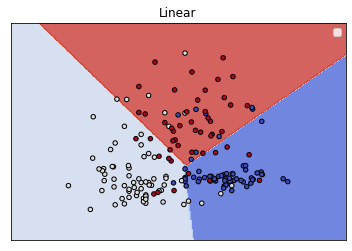

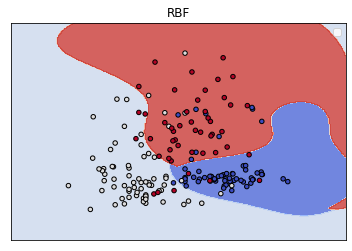

In [1]:
import numpy as np
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_wine()
x = dataset.data[:, :2]
y = dataset.target

print(">> Utilizando el kernel 'Linear'")
linear = svm.SVC(kernel='linear', C=1.0)
cls_linear = linear.fit(x, y)
fig, ax = plt.subplots()
X0, X1 = x[:, 0], x[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = cls_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Linear')
ax.legend()
plt.savefig("p3-linear.png")

print(">> Utilizando el kernel 'rbf'")
rbf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
cls_rbf = rbf.fit(x, y)
fig, ax = plt.subplots()
X0, X1 = x[:, 0], x[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = cls_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('RBF')
ax.legend()
plt.savefig('p3-rbf.png')

### 3. Clasificar por calidad a los vinos encontrados en el archivo winequality-red.csv ​ . ¿Cuáles son los valores promedio para obtener un vino de calidad 6?. Grafique la función de decisión obtenida. ¿Qué clasificador utilizó? Realizar el mismo análisis con otro método y comparar.
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

No handles with labels found to put in legend.


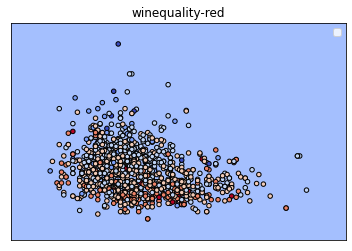

In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

dataframe = pd.read_csv('./Recursos/winequality-red.csv', delimiter=';')
x = dataframe[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = dataframe['quality'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
cls = SVC(C=1.0, kernel='rbf').fit(x_train, y_train)
y_pred = cls.predict(x_test)

fig, ax = plt.subplots()
X0, X1 = x_train[:, 0], x_train[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = cls_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('winequality-red')
ax.legend()
plt.savefig('p3-winequality-red-with-rbf.png')